---
title: stata教程02-线性回归分析小样本和大样本OLS
date: 2018-12-10 18:17:55
tags: [stata]
toc: true
mathjax: true

---

介绍一下如何使用stata做线性回归。
<span></span>
<!-- more -->

### 问题简介

Cobb-Douglas(柯布—道格拉斯)生产函数最初是美国数学家柯布(C.W.Cobb)和经济学家保罗·道格拉斯(PaulH.Douglas)共同探讨投入和产出的关系时创造的生产函数，是以美国数学家C．W．柯布和经济学家保罗．H．道格拉斯的名字命名的，是在生产函数的一般形式上作出的改进，引入了技术资源这一因素。用来预测国家和地区的工业系统或大企业的生产和分析发展生产的途径的一种经济数学模型，简称生产函数。

$$
Y = AK^{\alpha_1}L^{\alpha_2}F^{\alpha_3}
$$

记:

$$
r = \alpha_1 + \alpha_2 + \alpha_3 (为规模效应)
$$

如果对这个函数取对数, 就可以化为多元线性函数的形式:

$$
\ln Y = \ln(AK^{\alpha_1}L^{\alpha_2}F^{\alpha_3})
$$

### 数据

现在我们使用Nerlove对电力行业规模报酬的经典研究来介绍Stata的操作。从这里可以下载数据: 链接：https://pan.baidu.com/s/11x_UMqclrrWbFpZjq8dVxA 提取码：eb6u 。首先我们加载数据, 使用这个命令:

In [2]:
use ./data/nerlove.dta, clear

(Nerlove 1963 paper)


打开看下数据的基本情况:

In [3]:
describe


Contains data from ./data/nerlove.dta
  obs:           145                          Nerlove 1963 paper
 vars:            10                          13 Aug 2012 10:00
 size:         5,220                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
tc              float   %9.0g                 total cost
q               int     %8.0g                 total output
pl              float   %9.0g                 price of 

数据中有很多变量, 其中我们要用到的就是tc, q, pl, pf, pk, 他们的意义分别是: total cost, total output, price of labor, price of fuel user cost of capital. 我们还看到这几个变量 lntc lnq lnpf lnpk lnpl 这几个变量, 分别是上面变量的对数值, 这样我们就可以进行线性的多元回归分析了。

### 查看变量关系

使用散点图查看预测变量和被预测变量的关系:


(note: file C:/Users/syd/.stata_kernel_cache/graph5.svg not found)


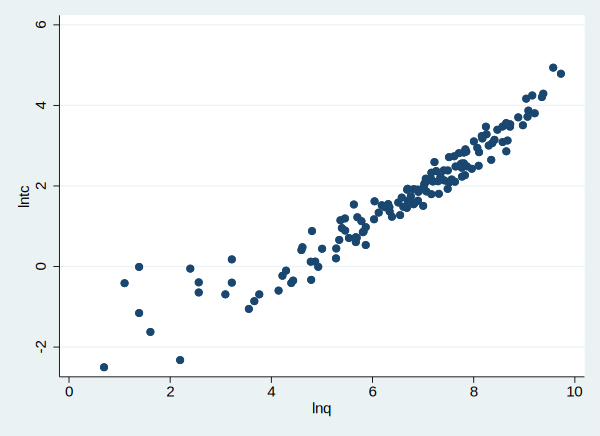

In [9]:
scatter lntc lnq


(note: file C:/Users/syd/.stata_kernel_cache/graph6.svg not found)


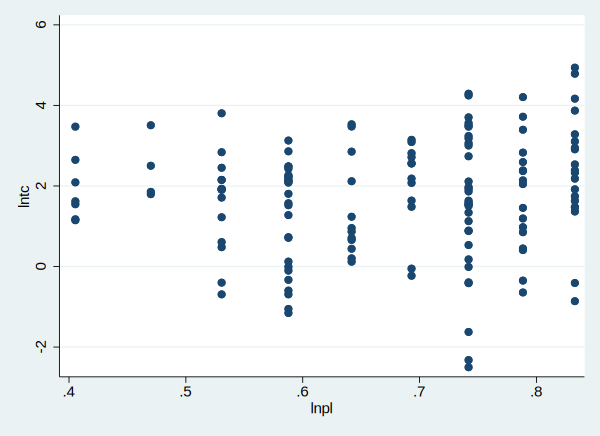

In [10]:
scatter lntc lnpl

### 小样本OLS回归

我们使用regress命令进行多元线性回归, 其中第一个变量代表被预测变量。

In [11]:
regress lntc lnq lnpl lnpk lnpf


      Source |       SS           df       MS      Number of obs   =       145
-------------+----------------------------------   F(4, 140)       =    437.90
       Model |  269.524728         4  67.3811819   Prob > F        =    0.0000
    Residual |  21.5420958       140  .153872113   R-squared       =    0.9260
-------------+----------------------------------   Adj R-squared   =    0.9239
       Total |  291.066823       144  2.02129738   Root MSE        =    .39227

------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |   .7209135   .0174337    41.35   0.000     .6864462    .7553808
        lnpl |   .4559645    .299802     1.52   0.131    -.1367602    1.048689
        lnpk |  -.2151476   .3398295    -0.63   0.528    -.8870089    .4567136
        lnpf |   .4258137   .1003218     4.24   0.

上表中$R^2=0.9260$, 检验整个方程的显著性的F统计量的结果是$F(4, 140)=437.90$, 显著性$Prob > F =  0.0000$, 说明这个方程是显著的。查看系数的检验, 我们发现lnpl和lnpk着两个系数是不显著的。

如果要显示系数的协方差矩阵, 可以输入:

In [12]:
vce


Covariance matrix of coefficients of regress model

        e(V) |        lnq        lnpl        lnpk        lnpf       _cons 
-------------+------------------------------------------------------------
         lnq |  .00030393                                                 
        lnpl | -.00035938   .08988127                                     
        lnpk |  .00034967   .02497537   .11548412                         
        lnpf |  .00030089  -.01124831  -.00669535   .01006447             
       _cons | -.00451909  -.15095534  -.59317676   .00784373   3.1662023 


In [13]:
regress lntc lnq lnpl lnpk lnpf, noc


      Source |       SS           df       MS      Number of obs   =       145
-------------+----------------------------------   F(4, 141)       =   1113.80
       Model |  700.203755         4  175.050939   Prob > F        =    0.0000
    Residual |  22.1602671       141  .157165015   R-squared       =    0.9693
-------------+----------------------------------   Adj R-squared   =    0.9685
       Total |  722.364022       145  4.98182084   Root MSE        =    .39644

------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |    .715823   .0174313    41.07   0.000     .6813626    .7502834
        lnpl |   .2859235    .290609     0.98   0.327    -.2885907    .8604377
        lnpk |  -.8833212   .0666914   -13.24   0.000    -1.015166   -.7514768
        lnpf |   .4346492   .1012917     4.29   0.

我们还可对只选择q > 6000的数据进行回归分析:

In [14]:
regress lntc lnq lnpl lnpk lnpf if q > 6000


      Source |       SS           df       MS      Number of obs   =        13
-------------+----------------------------------   F(4, 8)         =     14.00
       Model |  2.33793491         4  .584483728   Prob > F        =    0.0011
    Residual |  .333945194         8  .041743149   R-squared       =    0.8750
-------------+----------------------------------   Adj R-squared   =    0.8125
       Total |  2.67188011        12  .222656676   Root MSE        =    .20431

------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |   1.212556    .237543     5.10   0.001     .6647809    1.760331
        lnpl |   .6913333   .6146628     1.12   0.293    -.7260816    2.108748
        lnpk |   .2461871   .6262519     0.39   0.705    -1.197952    1.690327
        lnpf |   .1568302   .4893984     0.32   0.

如果我们还想要获得被预测变量的预测值, 并将这个向量保存道y_hat变量中:

In [15]:
predict y_hat

(option xb assumed; fitted values)


我们可以看到预测值和观测值之间的关系:


(note: file C:/Users/syd/.stata_kernel_cache/graph9.svg not found)


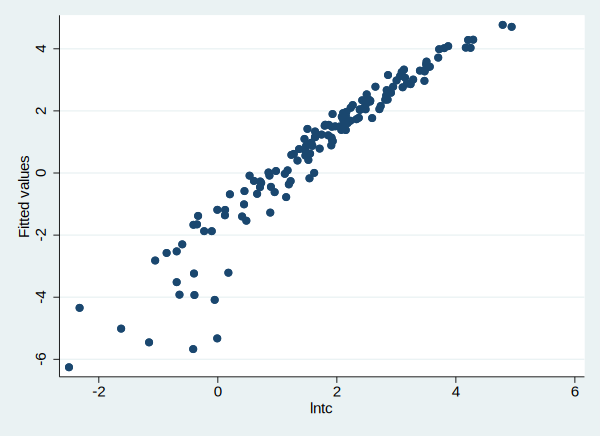

In [18]:
scatter y_hat lntc

### 检测系数值

我们还可以对系数值进行检验, 比如假设lnq的系数为1, 然后检验这个假设是否显著:

In [19]:
test lnq=1


 ( 1)  lnq = 1

       F(  1,     8) =    0.80
            Prob > F =    0.3970


这个假设没有被拒绝。

联合检测:

In [21]:
test (lnq=1) (lnpl+lnpk+lnpf=1)


 ( 1)  lnq = 1
 ( 2)  lnpl + lnpk + lnpf = 1

       F(  2,     8) =    0.54
            Prob > F =    0.6050


该假设也没有被拒绝。

我们也可以检验非线性假设, 比如检验变量lnpl的系数是lnq的系数的平方:

In [22]:
testnl _b[lnpl]=_b[lnq]^2


  (1)  _b[lnpl] = _b[lnq]^2

               chi2(1) =        0.56
           Prob > chi2 =        0.4531


这个假设也没有被拒绝。

### 约束回归

Stata可以进行约束回归, 我们的经济理论要求lnpl, lnpk, lnpl的系数之和为1, 所以在这个约束下, 我们重新估计方程:

In [23]:
constraint def 1 lnpl+lnpk+lnpf = 1

In [24]:
cnsreg lntc lnq lnpl lnpk lnpf, c(1)


Constrained linear regression                   Number of obs     =        145
                                                Root MSE          =     0.3915

 ( 1)  lnpl + lnpk + lnpf = 1
------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |   .7213365   .0173912    41.48   0.000     .6869553    .7557176
        lnpl |   .6064693    .207239     2.93   0.004      .196772    1.016167
        lnpk |  -.0208375   .1933394    -0.11   0.914    -.4030563    .3613813
        lnpf |   .4143682   .0987832     4.19   0.000     .2190805    .6096559
       _cons |  -4.636069   .8949922    -5.18   0.000    -6.405408   -2.866731
------------------------------------------------------------------------------


我们得到的系数中, 只有lnpl的系数是不显著的。

### 大样本OLS

数据中可能存在异方差等问题, 小样本的OLS估计可能是不准确的, 所以我们使用稳健的标准误进行系数显著性的检验。

In [27]:
reg lntc lnq lnpl lnpk lnpf, r


Linear regression                               Number of obs     =        145
                                                F(4, 140)         =     177.19
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9260
                                                Root MSE          =     .39227

------------------------------------------------------------------------------
             |               Robust
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |   .7209135   .0325376    22.16   0.000      .656585     .785242
        lnpl |   .4559645    .260326     1.75   0.082    -.0587139    .9706429
        lnpk |  -.2151476   .3233711    -0.67   0.507    -.8544698    .4241745
        lnpf |   .4258137   .0740741     5.75   0.000     .2793653    .5722622
       _cons |

我们可以看到Std. Err.上面多了一个Robust, 说明这是稳健的标准误, 它比标准误要大, 是的系数显著的可能性更小了, 所以也就更稳健了。

当然我们还可以进行条件检验:

In [28]:
test lnq=1


 ( 1)  lnq = 1

       F(  1,   140) =   73.57
            Prob > F =    0.0000


这个假设被拒绝了。